In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, json
from enterprise import pulsar
from settings import load_pulsars

import sys
IN_COLAB = 'google.colab' in sys.modules

In [5]:
if IN_COLAB:
    datadir = '/content/12p5yr_stochastic_analysis/tutorials/data'
else:
    datadir = './data'

# Exploring NANOGrav Data

  * In this tutorial, you will learn what information exists in the data used by the NANOGrav data working group to search for gravitational waves with pulsar timing data.

## Pulsar timing data
  `TEMPO`, `TEMPO2` and `PINT` are packages written in various programming languages to enable pulsar timing.

  These packages require:
  * Clock files that contain corrections necessary for accurate timing
  * Files that contain information about the orientation of Earth at each pulse time
  * An ephemeris to show the location and movement of solar system objects
  * Location of observatories where radio telescopes exist to record pulse times of arrival (TOAs)
  

### `.tim` files

`.tim` files contain the pulse TOAs.

Let's look at an example of a TOA

In [ ]:
# FORMAT 1
# 53358.000051.3.000.000.9y.x.ff 1442.000000 53358.727464829165176   0.382   ao  -fe L-wide -be ASP -f L-wide_ASP -bw 4 -tobs 903.76 -tmplt B1855+09.L-wide.PUPPI.9y.x.sum.sm -gof 1.02 -nbin 2048 -nch 1 -chan 0 -subint 0 -snr 468.67 -wt 15 -proc 9y -pta NANOGrav -to -0.839e-6

There are a few things to notice here:
* `MODE 1` indicates ...
* `FORMAT 1` is a TEMPO2 style format for the `.tim` file

The next line is several bits of information separated by spaces
* File name or identifier
* Observing frequency (MHz)
* Pulse site arrival time (MJD)
* Uncertainty on arrival time (microseconds)
* Observing site

The rest of the pieces are flags that denote receiver and backend, SNR, and other information that might be useful.

If a line starts with a `C`, it has been commented and therefore removed from the used data (perhaps as an outlier or of poor data quality)

### `.par` files
  `.par` files contain parameters that specify the best fit parameters for the timing model

  For example, let's look at a few lines from `B1855+09_NANOGrav_12yv3.gls.par`


In [ ]:
# PSR              B1855+09
# LAMBDA   286.8634874759636  1     0.0000000120871
# BETA      32.3214851773070  1     0.0000000190648
# PMLAMBDA           -3.2685  1              0.0092
# PMBETA             -5.0604  1              0.0176
# PX                  0.7149  1              0.1217
# POSEPOCH        55637.0000
# F0    186.4940812354548996  1  0.0000000000047889
# F1     -6.204791865029D-16  1  2.855227959554D-20
# PEPOCH        55637.000000
# START            53358.726
# FINISH           57915.276
# DM               13.313704
# DMX               0.500000

# ...

# FD1  1.08328810D-04  1      1.58206697D-05
# FD2 -1.22195906D-04  1      1.92718770D-05
# FD3  6.51517794D-05  1      1.16423594D-05
# SOLARN0               0.00
# EPHEM               DE436
# ECL                 IERS2010
# CLK                 TT(BIPM2017)                    
# UNITS               TDB
# TIMEEPH             FB90
# T2CMETHOD           TEMPO
# CORRECT_TROPOSPHERE N
# PLANET_SHAPIRO      N
# DILATEFREQ          N
# NTOA                  6464
# TRES                  1.28
# TZRMJD  55638.45920097032105
# TZRFRQ            1410.000
# TZRSITE                  AO
# MODE                     1
# NITS 1
# INFO -f                              
# BINARY            ELL1    
# A1             9.230780114  1         0.000000179
# PB       12.32717119153275  1    0.00000000015598
# TASC       55631.710921359  1         0.000000018
# EPS1         -0.0000215485  1        0.0000000195
# EPS2          0.0000024310  1        0.0000000128
# SINI              0.999100  1            0.000207
# M2                0.254144  1            0.010070
# RNAMP         0.53630D-01
# RNIDX            -3.42391
# T2EFAC -f 430_ASP   1.150
# T2EFAC -f 430_PUPPI   1.042
# T2EFAC -f L-wide_ASP   1.073
# T2EFAC -f L-wide_PUPPI   1.244
# T2EQUAD -f 430_ASP   0.08167
# T2EQUAD -f 430_PUPPI   0.51805
# T2EQUAD -f L-wide_ASP   0.31293
# T2EQUAD -f L-wide_PUPPI   0.01050
# ECORR -f 430_ASP   0.00318
# ECORR -f 430_PUPPI   1.83365
# ECORR -f L-wide_ASP   0.83016
# ECORR -f L-wide_PUPPI   0.25126
# JUMP -fe L-wide      -0.000020230  1       0.000004445

This file contains a lot of information about the model for B1855+09.

## ADD MORE HERE!

## `enterprise` Pulsar objects

`enterprise` can use these files to make `Pulsar` objects. These contain much of the information that the `par` and `tim` files do. More importantly, `Pulsar` objects can be used to search for gravitational waves!

Because pulsar objects can take so long to load, we have made a function which will save them to your computer as a pickle (at the cost of some space).

In [64]:
psrs = load_pulsars(datadir, PINT=False)

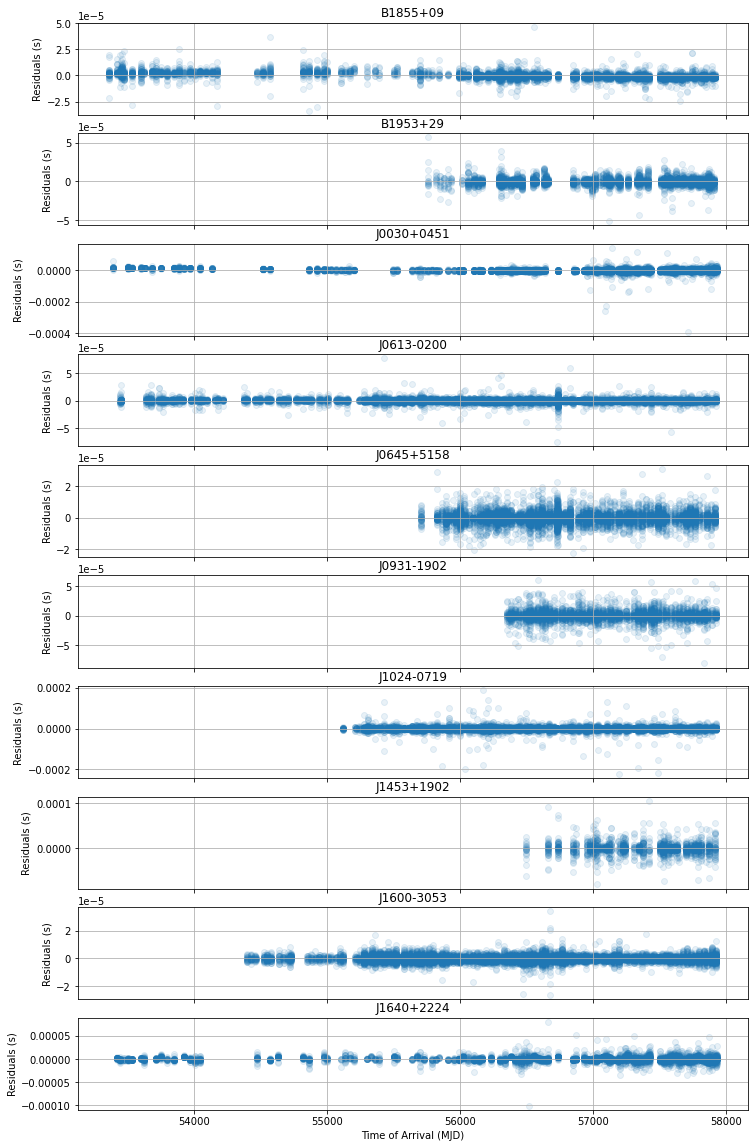

In [102]:
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(12, 20), sharex=True)
for ii in range(len(ax)):
    ax[ii].set_ylabel('Residuals (s)')
    ax[ii].set_title(psrs[ii * 2].name)
    ax[ii].scatter(psrs[ii * 2].toas / 86400, psrs[ii * 2].residuals, alpha=0.1)
    ax[-1].set_xlabel('Time of Arrival (MJD)')
    ax[ii].grid(visible=True)
plt.savefig('residuals.png', bbox_inches='tight', dpi=300)
plt.show()

* Here we have plotted the residuals for 10 different pulsars in the 12.5 year data set
* The total observation time span is different for each of the pulsars shown here
* Many of these pulsars have gaps in their data and are sampled unevenly
* For this reason **we do not work in the frequency domain when we search for gravitational waves**

* Next, we use `vars()` to print a dictionary of some attributes of a Pulsar object
* This should show us some of the data stored in the object

In [90]:
vars(psrs[0])

{'_sort': True,
 'planets': True,
 'name': 'B1855+09',
 '_toas': array([4.61019372e+09, 4.61019372e+09, 4.61019372e+09, ...,
        5.00388020e+09, 5.00388020e+09, 5.00388020e+09]),
 '_stoas': array([4.61019405e+09, 4.61019405e+09, 4.61019405e+09, ...,
        5.00387975e+09, 5.00387975e+09, 5.00387975e+09]),
 '_residuals': array([ 1.50490962e-06,  5.67110865e-07,  1.47881846e-06, ...,
        -2.95815515e-06, -1.58594102e-06, -1.33809972e-06]),
 '_toaerrs': array([3.820e-07, 6.070e-07, 2.156e-06, ..., 6.260e-07, 1.980e-07,
        3.040e-07]),
 '_designmatrix': array([[ 1.00000000e+00, -1.35100732e+02, -2.48066478e+02, ...,
          0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
        [ 1.00000000e+00, -1.35100732e+02, -2.48066478e+02, ...,
          0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
        [ 1.00000000e+00, -1.35100732e+02, -2.48066478e+02, ...,
          0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.89699710e+0

* The pulsar's name is under `name`
* We also find the residuals,
* TOA errors,
* timing model design matrix (it holds the timing model for this particular pulsar)
* among many other quantities.

We now turn to the noise dictionary to see what exists in the `channelized_12p5yr_v3_full_noisedict.json` file.

In [92]:
with open(datadir + '/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    noisedict = json.load(f)

In [100]:
for key in noisedict.keys():
    if 'B1855+09' in key:
        print(key, '=', noisedict[key])

B1855+09_430_ASP_efac = 1.149036589204419
B1855+09_430_ASP_log10_ecorr = -7.415374510054153
B1855+09_430_ASP_log10_tnequad = -7.379759355541006
B1855+09_430_PUPPI_efac = 1.0543836580555548
B1855+09_430_PUPPI_log10_ecorr = -5.671108063699219
B1855+09_430_PUPPI_log10_tnequad = -6.348065001180634
B1855+09_L-wide_ASP_efac = 1.080749375878354
B1855+09_L-wide_ASP_log10_ecorr = -6.092899143243734
B1855+09_L-wide_ASP_log10_tnequad = -6.51289896375955
B1855+09_L-wide_PUPPI_efac = 1.2429537099744354
B1855+09_L-wide_PUPPI_log10_ecorr = -6.641281263572077
B1855+09_L-wide_PUPPI_log10_tnequad = -7.821737281350602
B1855+09_red_noise_gamma = 4.223680673175877
B1855+09_red_noise_log10_A = -14.029792598548077


* For example, we are showing the values for B1855+09, a single pulsar.
* This file contains point estimates of white noise parameters.
* We use these in `enterprise` to reduce the number of parameters from ~600 to ~90.

* In this tutorial we have briefly discussed some of the data files that NANOGrav uses in its search for an isotropic gravitational wave background.
* `.par` and `.tim` files are given to `enterprise` to instantiate a `Pulsar` class object
* The `Pulsar` class contains several pieces of information that `enterprise` needs to run.